# Summary

This is regarding to dataset: https://www.kaggle.com/competitions/histopathologic-cancer-detection/overview

This note book serves for EDA of the data set, I will explore different aspects of the data.

## Import libs

In [1]:
import numpy as np 
import pandas as pd 
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

## Load data

In [3]:
root_folder = "/kaggle/input/histopathologic-cancer-detection"
train_df = pd.read_csv(os.path.join(root_folder, "train_labels.csv"))

## Explore the data frame

In [21]:
train_df.shape

(220025, 2)

In [42]:
train_df.dtypes

id       object
label     int64
dtype: object

In [6]:
train_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


(array([130908.,  89117.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

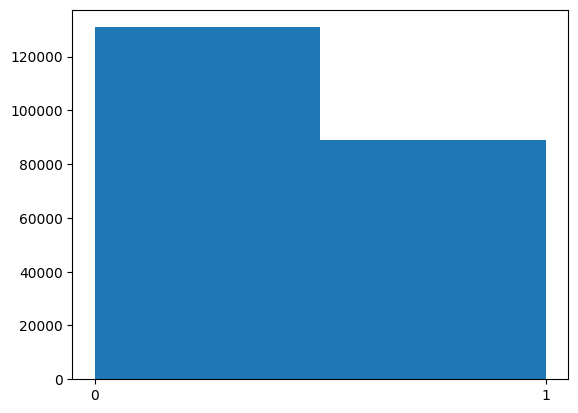

In [20]:
plt.hist(train_df["label"].astype('str').values, bins=2)

#### Data frame summary
* We can see that there are in total 220025 images in training data set, which are divided in to two classes (0 and 1, indicates if the center 32x32 pixals contains at least 1 pixel of tumer tissue)
* This is a binary classification problem. From the histgram we can see that the two classes are not well balanced, we should tackle that during our model training.

## Explore the images

In [23]:
pos_samples_tf = train_df[train_df["label"]==1].sample(n=5)
pos_samples_pathes = pos_samples_tf["id"].apply(lambda image_id: os.path.join(root_folder, "train", f"{image_id}.tif"))
neg_samples_tf = train_df[train_df["label"]==0].sample(n=5)
neg_samples_pathes = neg_samples_tf["id"].apply(lambda image_id: os.path.join(root_folder, "train", f"{image_id}.tif"))

In [39]:
def preview_images(pathes, title):
    image_count = len(pathes)
    plt.figure(figsize=(image_count*3+1, 3))
    for i, image_path in enumerate(pathes):
        plt.subplot(1, image_count, i+1)
        image = Image.open(image_path)
        plt.imshow(image)
        plt.title(title + str(np.array(image).shape))
        #plt.axis('off')
    plt.show()
    


#### Positive images

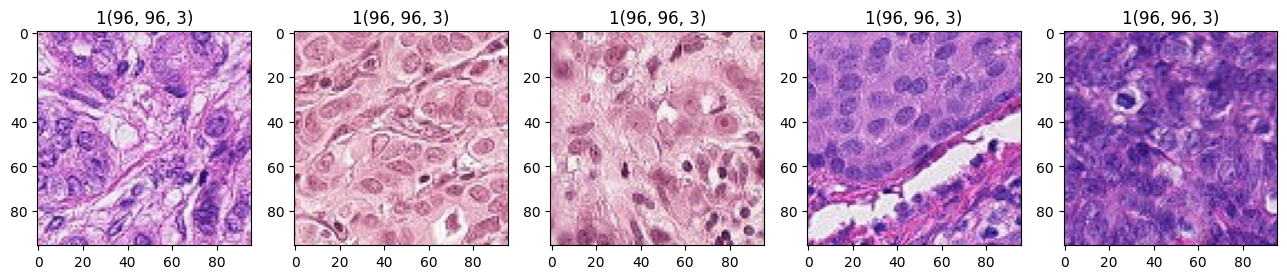

In [40]:
preview_images(pos_samples_pathes, "1")

#### Negative images

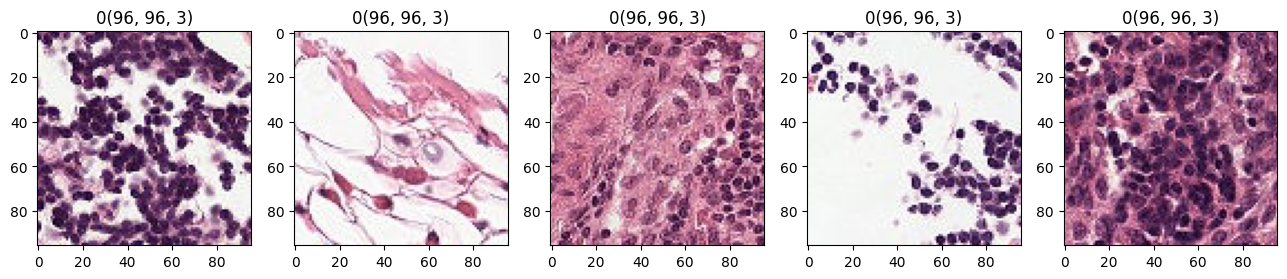

In [41]:
preview_images(neg_samples_pathes, "0")

#### Image summary
* Images are all 96x96 3 channel color images. 
* While what we need to detect is the if the center 32x32 area contains tumor tissue, we may consider cropping the images for the training, other wise it may detect the non-related areas.
* The images have different stain color styles, we may need to do color related augmentation and/or normalize the color for the training.
* With eyeball I can not tell the differences between the positive and negative images, I would relay on the model to detect the difference.